TUGAS 2 PRAKTISI
IMPLEMENTASI FILE SHOPPING_DATASET
(SONY ABDHILLAH/3022110012)

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import imblearn as imb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = pd.read_csv('/content/drive/MyDrive/baru/Shopping_Dataset.csv')

30


,Day,Discount,Free Delivery,Purchase
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekday,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekend,Yes,Yes,Yes


In [11]:
data.isna().sum()

Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

In [52]:
shopping_dataset = data.dropna()
print(len(shopping_dataset))
shopping_dataset.isna().sum()

30


Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

<Axes: xlabel='Purchase', ylabel='count'>

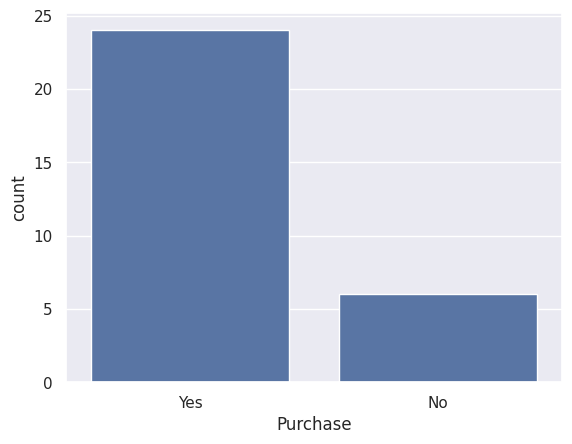

In [55]:
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=shopping_dataset)

In [57]:
X = shopping_dataset.loc[:, shopping_dataset.columns != 'Purchase']
y = shopping_dataset.loc[:, shopping_dataset.columns == 'Purchase']

OVERSAMPLING

In [63]:
oversample = imb.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [64]:
X_over, y_over = oversample.fit_resample(X,y)

In [65]:
len(X_over)

48

<Axes: xlabel='Purchase', ylabel='count'>

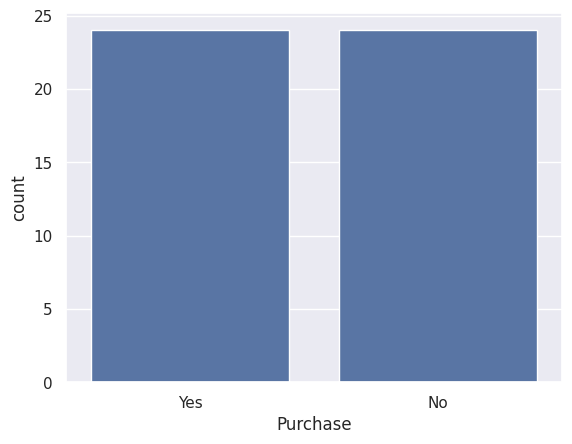

In [67]:
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_over)

UNDERSAMPLING

In [68]:
undersample = imb.under_sampling.RandomUnderSampler(sampling_strategy='majority')

In [69]:
X_under, y_under = undersample.fit_resample(X,y)

In [70]:
len(X_under)

12

<Axes: xlabel='Purchase', ylabel='count'>

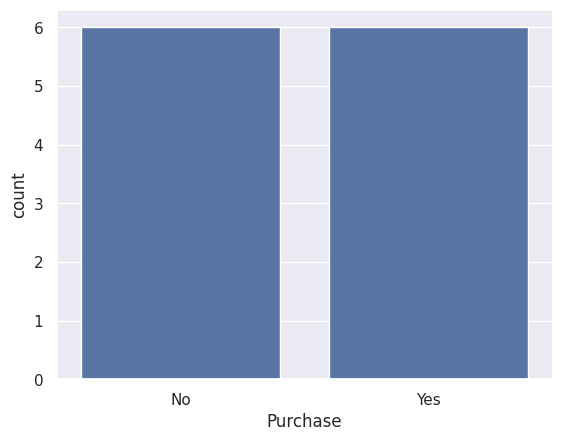

In [73]:
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_under)

OVER TO UNDER

<Axes: xlabel='Purchase', ylabel='count'>

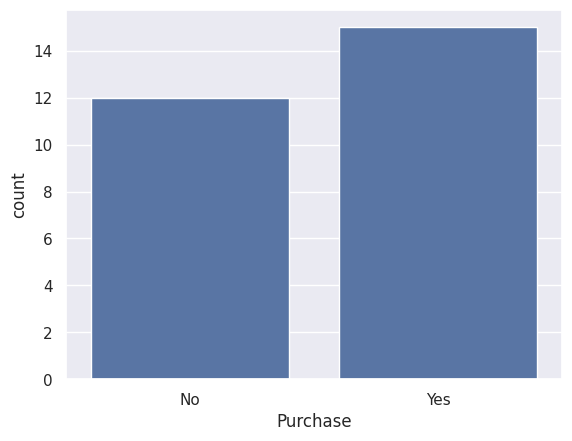

In [74]:
over = imb.over_sampling.RandomOverSampler(sampling_strategy=0.5)
X_co, y_co = over.fit_resample(X,y)

under = imb.under_sampling.RandomUnderSampler(sampling_strategy=0.8)
X_c, y_c = under.fit_resample(X_co, y_co)

sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_c)

UNDER TO OVER

<Axes: xlabel='Purchase', ylabel='count'>

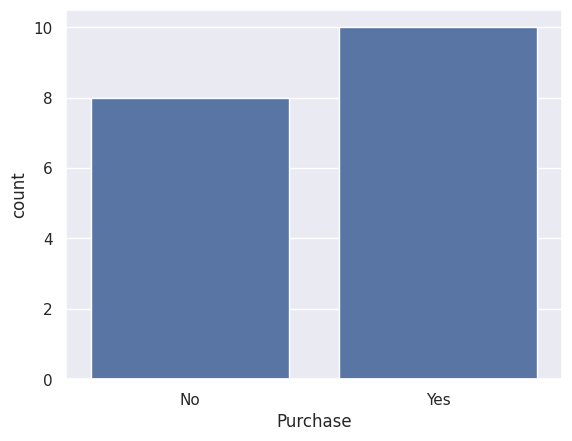

In [75]:
under = imb.under_sampling.RandomUnderSampler(sampling_strategy=0.6)
X_co, y_co = under.fit_resample(X, y)

over = imb.over_sampling.RandomOverSampler(sampling_strategy=0.8)
X_c, y_c = over.fit_resample(X_co, y_co)

sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_c)

NAIVE BAYES

In [12]:
# load dataset
data = fetch_20newsgroups()

In [13]:
data.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [14]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [19]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [21]:
print(len(test.target_names))
print(test.data[5])

4
From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: free moral agency
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL9]
Distribution: na
Lines: 15

Kent Sandvik (sandvik@newton.apple.com) wrote:

: I agree, I had a hard feeling not believing my grand-grand mother
: who told me of elves dancing outside barns in the early mornings.
: I preferred not to accept it, even if her statement provided
: the truth itself. Life is hard.


Kent,

Truly a brilliant rebuttal. Apparently you are of the opinion that
ridicule is a suitable substitute for reason; you'll find plenty of
company a.a

Bill



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [23]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [24]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

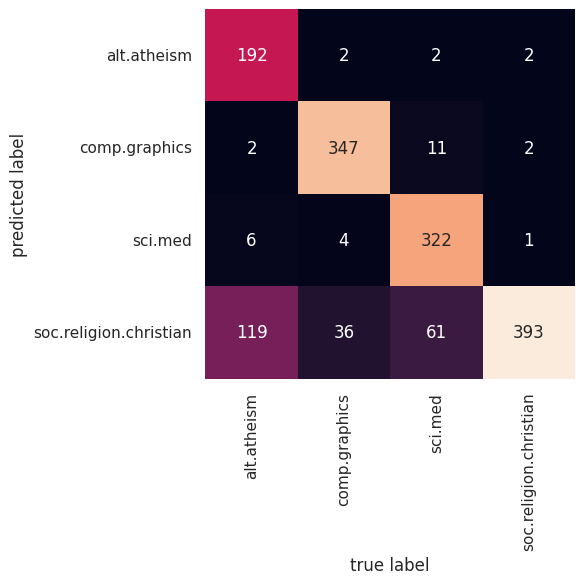

In [26]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(test.target, labels)
print(acc_score)

0.8348868175765646


In [35]:
# membuat fungsi prediksi data baru
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return pred[0]

In [36]:
predict_category('Elon Musk launches Starlink in Indonesia')

0

In [38]:
predict_category("Toyota said its next generation of clean, compact engines is completely different from anything today")

3